In [1]:
import pandas as pd
import random
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import os
from MCForecastTools import MCSimulation

In [2]:
load_dotenv()

True

In [3]:
alpaca_key = os.getenv("ALPACA_API_KEY")
alpaca_secret = os.getenv("ALPACA_SECRET_KEY")

In [4]:
companies= ["AMZN", "COST", "WMT"]

In [5]:
alpaca = tradeapi.REST(
    alpaca_key,
    alpaca_secret,
    api_version="v2"
)

In [6]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2017-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["AMZN","COST", "WMT"]

# Get 3 year's worth of historical price data for AMZN, TGT, and WMT.
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_ticker.tail()

AMZN                                         \
                              open     high        low    close    volume   
time                                                                        
2020-04-27 00:00:00-04:00  2443.20  2444.88  2363.0000  2376.82  10185891   
2020-04-28 00:00:00-04:00  2372.10  2373.50  2306.0000  2314.08   4643171   
2020-04-29 00:00:00-04:00  2330.01  2391.89  2310.0000  2371.88   7930384   
2020-04-30 00:00:00-04:00  2419.84  2471.50  2396.0100  2471.50   6873149   
2020-05-01 00:00:00-04:00  2336.80  2362.44  2258.1902  2285.94  18176321   

                              COST                                       \
                              open      high       low   close   volume   
time                                                                      
2020-04-27 00:00:00-04:00  313.050  313.2900  307.5900  308.67  8168992   
2020-04-28 00:00:00-04:00  310.825  311.2700  304.2800  304.86  4378791   
2020-04-29 00:00:00-04:00  304.950  308.6832  301.1206  307.09  6561442   
2020-04-30 00:00:00-04:00  306.150  307.8950  302.5700  303.01  4777980   
2020-05-01 00:00:00-04:00  301.780  304.8199  300.1800  301.92  2027707   

                              WMT                                      
                             open      high     low   close    volume  
time                                                                   
2020-04-27 00:00:00-04:00  130.00  130.3076  128.17  128.22   4797540  
2020-04-28 00:00:00-04:00  128.28  130.2400  127.70  128.01   6422893  
2020-04-29 00:00:00-04:00  125.57  125.7600  122.55  123.63  13607650  
2020-04-30 00:00:00-04:00  123.08  123.4362  121.04  121.54  11032624  
2020-05-01 00:00:00-04:00  121.48  123.6900  120.78  122.96   9667683

In [7]:
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [8]:
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [9]:
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.33,.33,.33],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [10]:
MC_fiveyear.portfolio_data.head()

AMZN                                    \
                             open    high      low   close   volume   
time                                                                  
2017-05-01 00:00:00-04:00  927.80  954.40  927.800  948.43  3909398   
2017-05-02 00:00:00-04:00  946.75  950.10  941.413  946.94  2675890   
2017-05-03 00:00:00-04:00  946.00  946.00  935.900  941.02  2564531   
2017-05-04 00:00:00-04:00  944.31  945.00  934.215  937.53  1588774   
2017-05-05 00:00:00-04:00  940.65  940.79  930.300  934.15  1888691   

                                          COST                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-05-01 00:00:00-04:00          NaN  178.50  178.50  168.46  168.47   
2017-05-02 00:00:00-04:00    -0.001571  178.72  178.84  169.03  169.16   
2017-05-03 00:00:00-04:00    -0.006252  169.32  180.46  169.28  179.80   
2017-05-04 00:00:00-04:00    -0.003709  180.05  183.18  180.00  182.38   
2017-05-05 00:00:00-04:00    -0.003605  182.77  182.92  179.76  180.20   

                                                   WMT                    \
                            volume daily_return   open     high      low   
time                                                                       
2017-05-01 00:00:00-04:00  2754937          NaN  75.09  75.7150  75.0900   
2017-05-02 00:00:00-04:00  1984887     0.004096  75.30  75.7100  75.2500   
2017-05-03 00:00:00-04:00  2332164     0.062899  75.40  75.8800  75.1775   
2017-05-04 00:00:00-04:00  3162667     0.014349  75.93  76.3950  75.8300   
2017-05-05 00:00:00-04:00  2794819    -0.011953  76.42  76.6043  76.1800   

                                                        
                           close   volume daily_return  
time                                                    
2017-05-01 00:00:00-04:00  75.25  4817918          NaN  
2017-05-02 00:00:00-04:00  75.53  5860809     0.003721  
2017-05-03 00:00:00-04:00  75.74  3998008     0.002780  
2017-05-04 00:00:00-04:00  76.33  4203671     0.007790  
2017-05-05 00:00:00-04:00  76.48  4756663     0.001965

In [11]:
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998127,0.998219,1.010987,0.993408,0.976430,0.993370,0.990295,1.008366,0.997267,1.008618,...,1.008313,0.995269,0.990462,1.000860,1.000370,1.018447,0.991177,1.000988,0.994103,1.001359
2,1.016787,0.989948,1.002205,0.993627,0.970995,1.005767,0.994396,0.997782,1.002588,1.008771,...,1.021165,0.995399,0.978909,0.991282,0.993692,1.001702,0.994633,0.999075,0.999741,0.994921
3,1.034525,0.994933,1.012823,0.993430,0.959293,1.004716,0.986229,0.998391,0.994415,0.998112,...,1.015587,0.979722,0.977132,0.982250,0.991332,1.017192,1.000205,1.000453,0.994353,1.007062
4,1.035236,1.005536,1.016196,1.001541,0.951603,0.998611,0.986717,1.001451,0.988254,1.009655,...,1.002290,0.982493,0.996091,0.976107,0.995894,1.017007,1.008038,1.000775,0.998795,1.030040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,4.183239,3.347125,2.674939,6.209705,4.321504,1.660101,3.873635,3.112286,2.940004,2.925909,...,5.436632,3.211103,2.802204,3.501493,3.734711,6.198440,2.213824,4.473574,3.867438,4.690516
1257,4.177875,3.338163,2.661410,6.259035,4.323346,1.679664,3.894058,3.083653,2.961568,2.871720,...,5.432024,3.225813,2.800974,3.566453,3.689604,6.253446,2.232133,4.513950,3.833910,4.636570
1258,4.165065,3.301896,2.656866,6.218119,4.350615,1.668323,3.886855,3.088211,2.962522,2.874938,...,5.406223,3.200891,2.768027,3.549807,3.695773,6.282072,2.207379,4.498454,3.764208,4.616243
1259,4.192079,3.320424,2.688344,6.238914,4.351793,1.672604,3.892775,3.132022,2.994281,2.893551,...,5.438512,3.164972,2.796030,3.531778,3.763736,6.290381,2.186823,4.602735,3.726064,4.530665


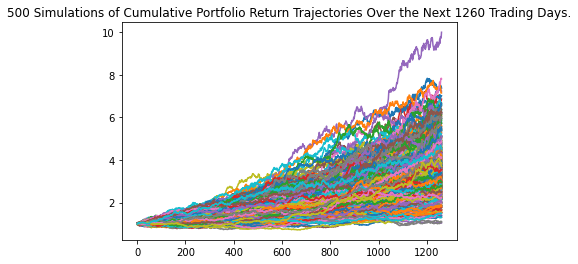

In [12]:
line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

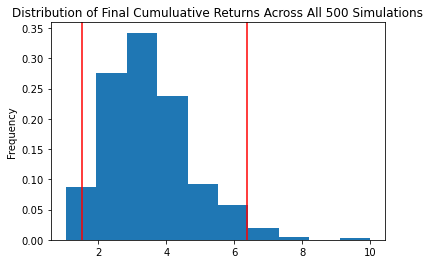

In [13]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [14]:
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              3.504759
std               1.254327
min               1.048476
25%               2.664962
50%               3.323318
75%               4.158629
max               9.990130
95% CI Lower      1.539036
95% CI Upper      6.368504
Name: 1260, dtype: float64


In [15]:
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $15390.36 and $63685.04


In [16]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [17]:
# Setup Alpaca API environment
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [18]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set the stock tickers
tickers = ["AMZN","COST","WMT"]

# Get 1 year's worth of historical data for all stocks
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_ticker.head()

AMZN                                          \
                              open       high        low    close   volume   
time                                                                         
2019-05-01 00:00:00-04:00  1933.09  1943.6400  1910.5500  1911.29  2814558   
2019-05-02 00:00:00-04:00  1913.33  1921.5500  1881.8700  1901.72  3641665   
2019-05-03 00:00:00-04:00  1949.00  1964.4000  1936.0000  1961.76  5687567   
2019-05-06 00:00:00-04:00  1917.98  1959.0000  1910.5000  1950.29  4911645   
2019-05-07 00:00:00-04:00  1939.99  1949.1005  1903.3795  1922.58  5451477   

                             COST                                       WMT  \
                             open     high     low   close   volume    open   
time                                                                          
2019-05-01 00:00:00-04:00  245.34  245.460  241.55  241.60  1125283  102.77   
2019-05-02 00:00:00-04:00  241.76  242.885  240.42  242.68  1103548  101.43   
2019-05-03 00:00:00-04:00  243.27  244.880  242.72  244.61   790496  102.32   
2019-05-06 00:00:00-04:00  242.85  244.830  242.06  244.23  1014151  100.75   
2019-05-07 00:00:00-04:00  241.72  242.735  238.22  240.22  1474984  101.80   

                                                              
                             high       low   close   volume  
time                                                          
2019-05-01 00:00:00-04:00  102.81  101.2800  101.34  4459381  
2019-05-02 00:00:00-04:00  102.06  100.2351  101.15  3509151  
2019-05-03 00:00:00-04:00  102.75  101.8000  102.07  4749798  
2019-05-06 00:00:00-04:00  102.55  100.5400  102.46  3871372  
2019-05-07 00:00:00-04:00  102.17  100.7555  101.31  3749256

In [19]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices for all the tickers
for ticker in tickers:
    df_closing_prices[ticker] = df_ticker[ticker]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.tail()

,AMZN,COST,WMT
2020-04-27,2376.82,308.67,128.22
2020-04-28,2314.08,304.86,128.01
2020-04-29,2371.88,307.09,123.63
2020-04-30,2471.50,303.01,121.54
2020-05-01,2285.94,301.92,122.96


In [20]:
# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.head()

,AMZN,COST,WMT
2019-05-02,-0.005007,0.004470,-0.001875
2019-05-03,0.031571,0.007953,0.009095
2019-05-06,-0.005847,-0.001553,0.003821
2019-05-07,-0.014208,-0.016419,-0.011224
2019-05-08,-0.002980,0.003913,-0.009871


In [21]:
df_daily_returns.tail()

,AMZN,COST,WMT
2020-04-27,-0.013768,-0.006022,-0.009349
2020-04-28,-0.026397,-0.012343,-0.001638
2020-04-29,0.024978,0.007315,-0.034216
2020-04-30,0.042000,-0.013286,-0.016905
2020-05-01,-0.075080,-0.003597,0.011683


<AxesSubplot:ylabel='Frequency'>

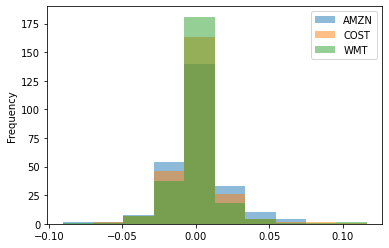

In [22]:
# Visualize the distribution of daily returns across all stocks using a histogram plot
# Hint: To make the plot easier to read, set the alpha arguement to 0.5
df_daily_returns.plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Density'>

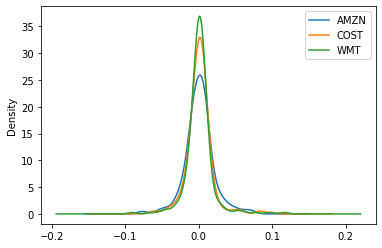

In [23]:
# Visualize the distribution of daily returns across all stocks using a density plot
df_daily_returns.plot.density()